<img src='logo.png' style='display: block;height: 61px;float: left;padding: .75rem 1.25rem;'>

# Desafío - Máquinas de Soporte Vectorial
* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el `.zip` a la seccióncorrespondiente.

## Descripción

Para esta sesión trabajaremos con la base de datos sobre cáncer mamario de Wisconsin. El objetivo es desarrollar un Clasificador mediante Máquinas de Soporte de Vectores que predica de forma adecuada en base a una serie de atributos sobre la composición del núcleo de una célula mamaria. Para más detalles técnicos asociados a la base de datos, pueden hacer click en el [link](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names).

## Ejercicio 1: Preparar el ambiente de trabajo

* Importe todas las librerías a utilizar.
* Fije los parámetros de los gráficos con `plt.Rcparams`.
* Excluya las columnas `id` y `Unnamed: 32` de la base de datos.
* Recodifique el vector objetivo `diagnosis` a numérico para poder procesarlo posteriormente.

> Se utilizan librerías bases para el tratamiento de datos y algunos aspectos básicos de cálculo y gráficos.

In [1]:
# Se importa libreria para el manejo de bases de datos
import pandas as pd
# Se importa libreria para el manejo de operaciones de cálculo
import numpy as np
# Se importa libreria para el manejo de gráficos
import matplotlib.pyplot as plt
# Se importa libreria para manejo de funciones estadisticas y probabilidades
import seaborn as sns
# Librería para visualizar patrones de datos perdidos
import missingno as msngo
# Se importa libreria para el menejo de warning
import warnings

> Definimos algunos aspectos de ambiente y valores por defecto.

In [2]:
# Por defecto, matplotlib crea una figura en una ventana separada.
# podemos hacer que las figuras aparezcan en línea dentro del notebook; lo hacemos ejecutando:
%matplotlib inline
# Se ignoran los warning para evitar suciedad en la ejecución
warnings.filterwarnings(action='ignore')
# Se define el estilo de gráficos a usar
plt.style.use('seaborn-pastel')
# Se define el tamaño de los paños de los gráficos por defecto
plt.rcParams['figure.figsize'] = (14, 8)
# Dado que vamos a supervisar datos no limitaremos la cantidad de columnas a mostrar en el despliegue del dataframe
pd.options.display.max_columns = None

> Se utiliza <strong>librería propia</strong> que continen funciones auxiliares, necesarias para el desarrollo de desafíos.

In [3]:
# Se importa libreria con funciones auxiliares
import ancilliary_funcs as afx

> Se utilizan librerías <strong>sklearn</strong> para el modelo, el tratamiento de escala de valores de los atributos y seleccion de set de datos:

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.svm import SVC
# Método para la selección de datos entre entrenamiento, test y CV
from sklearn.model_selection import train_test_split, GridSearchCV

In [5]:
# Se carga la base de datos y se elimina la columna index que no agrega valor.
df = pd.read_csv('breast_cancer.csv').drop(columns = ['id', 'Unnamed: 32'])

In [6]:
# Inspeccionamos los datos
df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
93,B,13.45,18.30,86.60,555.1,0.10220,0.08165,0.03974,0.02780,0.1638,0.05710,0.2950,1.373,2.099,25.220,0.005884,0.01491,0.01872,0.009366,0.01884,0.001817,15.10,25.94,97.59,699.4,0.1339,0.1751,0.1381,0.07911,0.2678,0.06603
162,M,19.59,18.15,130.70,1214.0,0.11200,0.16660,0.25080,0.12860,0.2027,0.06082,0.7364,1.048,4.792,97.070,0.004057,0.02277,0.04029,0.013030,0.01686,0.003318,26.73,26.39,174.90,2232.0,0.1438,0.3846,0.6810,0.22470,0.3643,0.09223
376,B,10.57,20.22,70.15,338.3,0.09073,0.16600,0.22800,0.05941,0.2188,0.08450,0.1115,1.231,2.363,7.228,0.008499,0.07643,0.15350,0.029190,0.01617,0.012200,10.85,22.82,76.51,351.9,0.1143,0.3619,0.6030,0.14650,0.2597,0.12000
248,B,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,0.2497,1.493,1.497,16.640,0.007189,0.01035,0.01081,0.006245,0.02158,0.002619,12.25,35.19,77.98,455.7,0.1499,0.1398,0.1125,0.06136,0.3409,0.08147
86,M,14.48,21.46,94.25,648.2,0.09444,0.09947,0.12040,0.04938,0.2075,0.05636,0.4204,2.220,3.301,38.870,0.009369,0.02983,0.05371,0.017610,0.02418,0.003249,16.21,29.25,108.40,808.9,0.1306,0.1976,0.3349,0.12250,0.3020,0.06846


> Se revisan los datos perdidos para no agregar valores perdidos en la binarización

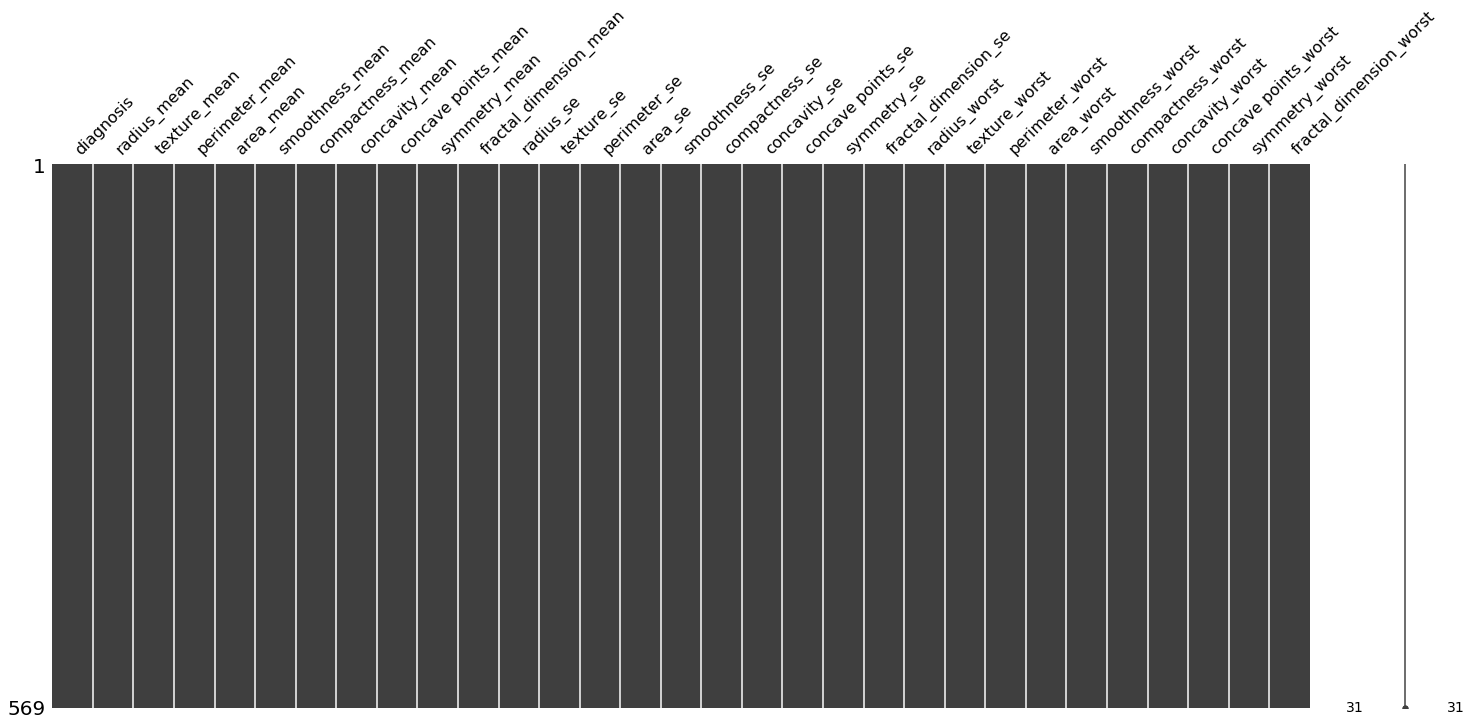

In [7]:
msngo.matrix(df)

In [8]:
# Revisamos las dimensiones de la base de datos
df.shape

(569, 31)

In [9]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

> La base de datos se compone de 569 observaciones con 30 atributos y el vector de clases [diagnosis]. Podemos observar que hay un desbalanceo de muestras ya que vemos que hay 357 datos etiquetados con la __clase B__ y 212 con la __clase M.__

In [10]:
# Se recodifica la columna diagnosis
df['diagnosis_bin'] = np.where(df['diagnosis']=='M', 1, -1)

> Se elimina la columna __diagnosis__ original

In [11]:
df.drop(columns='diagnosis', inplace=True)

## Ejercicio 2: Visualizando la distribución de los atributos

* Para cada uno de los atributos, grafique los histogramas condicional a cada clase del vector objetivo.
* Agregue las medias correspondientes y reporte a grandes rasgos cuáles son los atributos con una mayor similitud en la distribución.

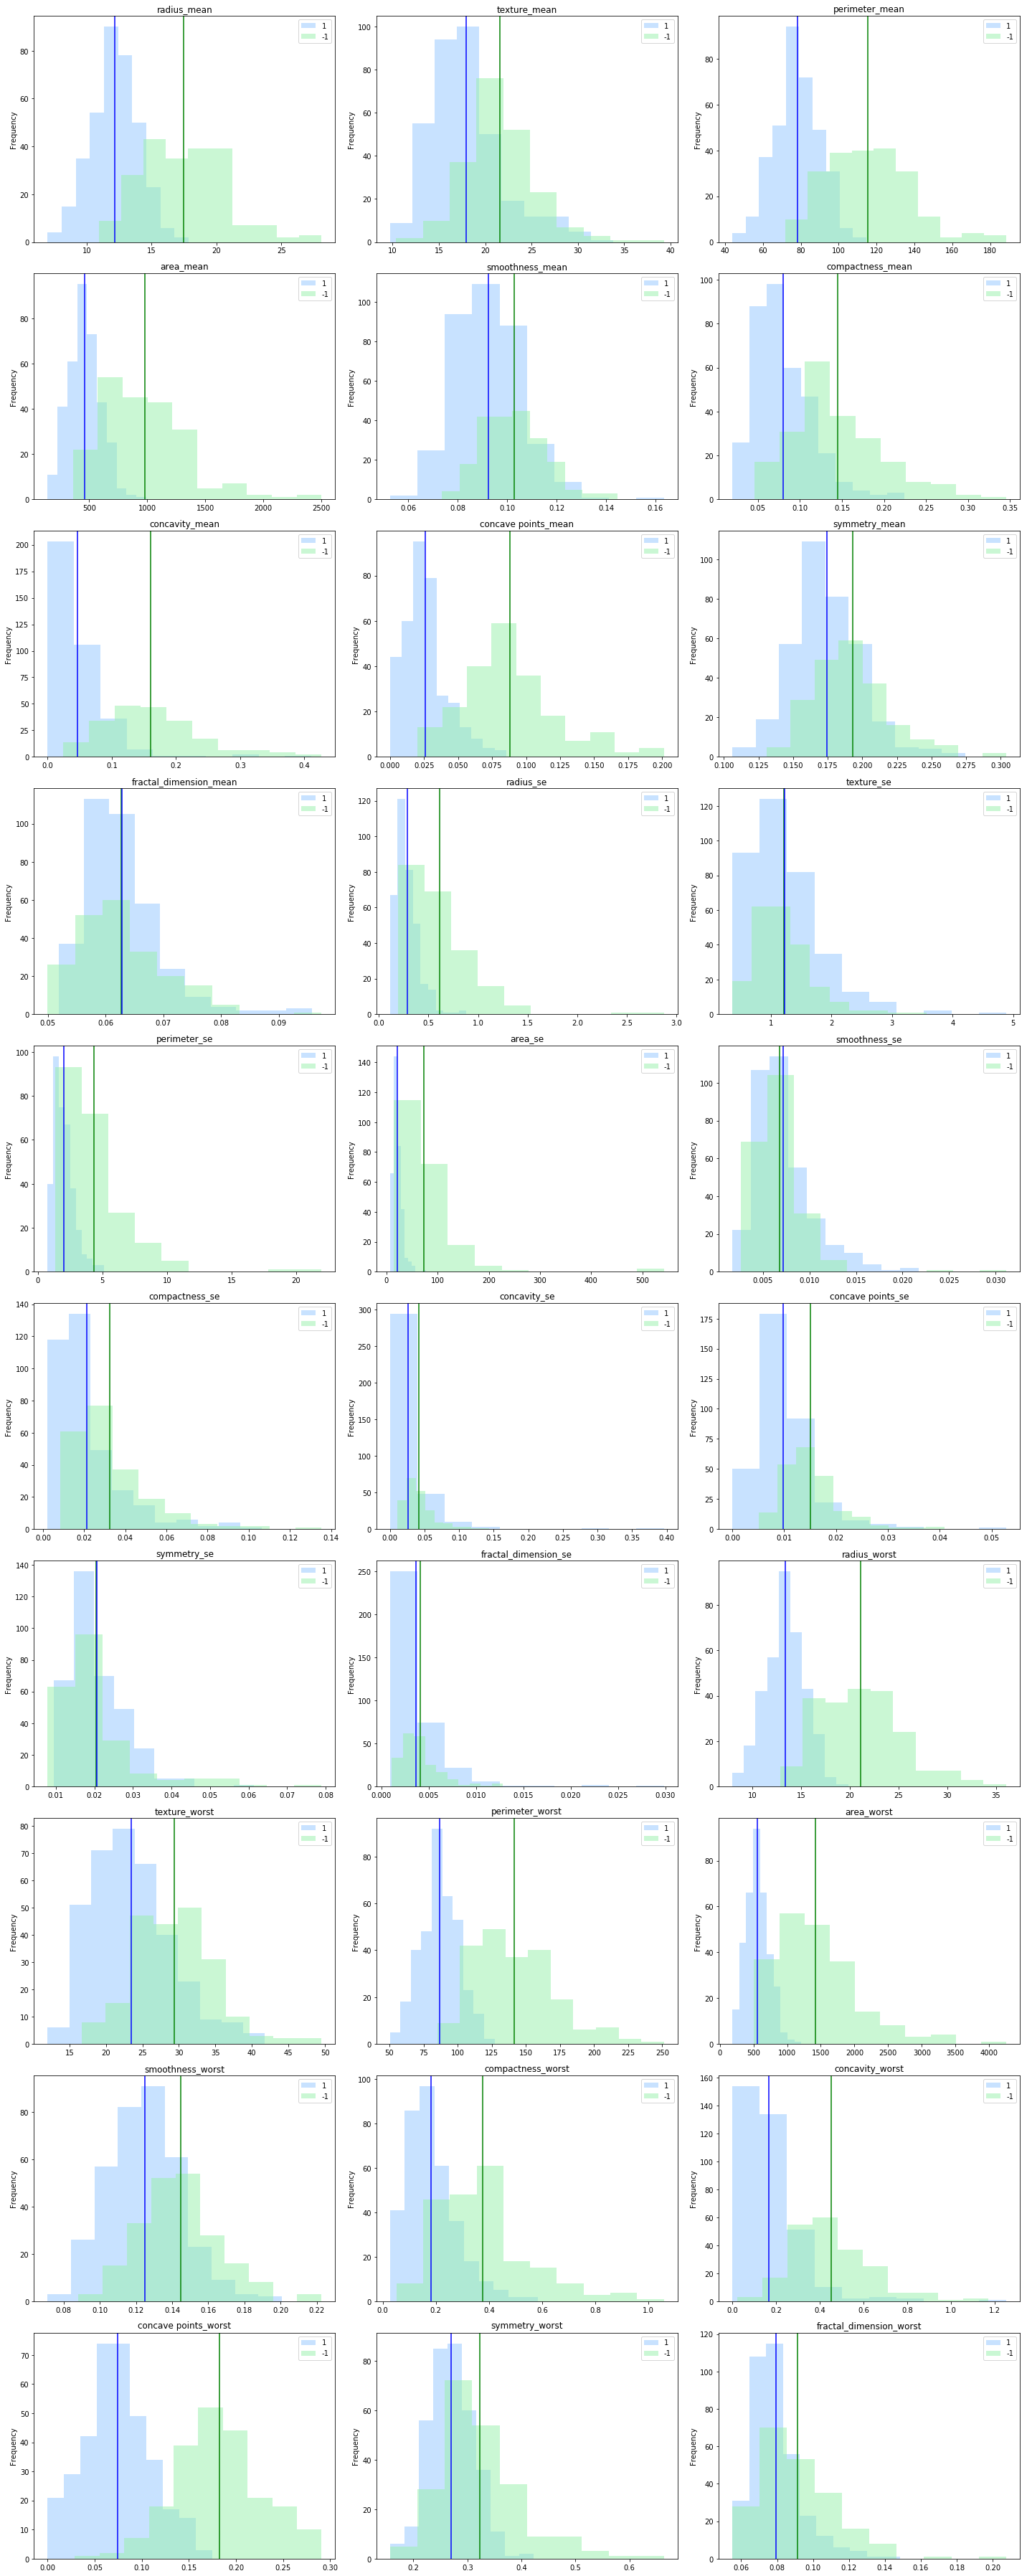

In [12]:
col = 3
rows = 10
plt.figure(figsize=(20, 50))
for index, (colname, serie) in enumerate(df.drop(columns = 'diagnosis_bin').iteritems()):
    plt.subplot(rows, col, index + 1)
    df.groupby('diagnosis_bin')[colname].plot(kind='hist', alpha=.5)
    plt.legend(df['diagnosis_bin'].unique())
    plt.axvline(df.groupby('diagnosis_bin')[colname].mean()[1], color = 'green')
    plt.axvline(df.groupby('diagnosis_bin')[colname].mean()[-1], color = 'blue')
    plt.title(colname)
    plt.tight_layout()

> __Comentario__:

Se observa que los atributos student e income tienen distribuciones acopladas tanto para la clase 0, como la clase 1, en cambio el atributo balance se visualiza con valores mas separados entre la clase 0 y clase 1.

## Ejercicio 3: Estimando el porcentaje de overlap en los atributos

* Parte de las virtudes de las Máquinas de Soporte Vectorial es la capacidad de lidiar con clases no separables mediante el proceso de kernelización. Resulta que un aspecto importante que muchas veces se obvía es medir la noseparabilidad de los atributos, condicional a cada clase del vector objetivo.
* El procedimiento para estimar el rango de noseparabilidad entre clases se implementa en Python de la siguiente manera:

In [13]:
def histogram_overlap(df, attribute, target, perc=100):
    """
    Descripción: Se calcula el porcentaje de superposición de clases en los atributos
    Entrada:
        df, DataFrame con los datos a analizar
        attribute, String con el nombre del atributo a evaluar
        target, String con el nombre de la columna que contiene las clases
        perc, cobertura
    Salida:
        intersection, Float porcentaje de comunalidad entre ambas clases, 
        donde mayores niveles indican una mayor comunalidad.
    """
    # get lower bound
    empirical_lower_bound = np.floor(df[attribute].min())
    # get upper bound
    empirical_upper_bound = np.ceil(df[attribute].max())
    # preserve histograms
    tmp_hist_holder = dict()
    # for each target class
    for unique_value in np.unique(df[target]):
        # get histogram
        tmp, _ = np.histogram(
            # for a specific attribute
            df[df[target] == unique_value][attribute],
            # define percentage
            bins=perc,
            # limit empirical range for comparison
            range=[empirical_lower_bound, empirical_upper_bound]
)
        # append to dict
        tmp_hist_holder["h_"+str(unique_value)] = tmp
    get_minima = np.minimum(tmp_hist_holder["h_1"], tmp_hist_holder["h_-1"])
    intersection = np.true_divide(np.sum(get_minima),
np.sum(tmp_hist_holder["h_-1"]))
    return intersection

* La intersección devolverá el porcentaje de comunalidad entre ambas clases, donde mayores niveles indican una mayor comunalidad.
* Utilizando la función, genere un dataframe donde almacenará el nombre del atributo y su porcentaje. Ordene este dataframe de forma descendente y preserve.

In [14]:
Overlap = pd.DataFrame([(x, 
              histogram_overlap(df, x, 'diagnosis_bin', perc=100)) 
             for x in df.drop(columns = 'diagnosis_bin').columns
            ], columns=['Atributo', 'Overlap']).sort_values(by='Overlap', ascending = False)

In [15]:
# Revisamos el DataFrame
Overlap

,Atributo,Overlap
19,fractal_dimension_se,0.593838
14,smoothness_se,0.591036
9,fractal_dimension_mean,0.588235
18,symmetry_se,0.568627
11,texture_se,0.549020
15,compactness_se,0.523810
4,smoothness_mean,0.521008
8,symmetry_mean,0.509804
17,concave points_se,0.507003
29,fractal_dimension_worst,0.492997


## Ejercicio 4: Selección del modelo por GridSearchCV

* Entrene una serie de modelos SVC con los siguientes hiperparámetros:
    * C: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
    * gamma: [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10].
    * Validaciones cruzadas: 10.
Genere un heatmap en base a los puntajes estimados con `GridSearchC`.

_tip_: Vea cómo acceder a la llave `mean_test_score`en el diccionario `cv_results_`.

>__Digresión: Un par de elementos a considerar en la implementación de `GridSearchCV`.__
>
>Si trabajamos con `sklearn.model_selection.GridSearchCV`, tan solo haciendo la división en dos muestras es suficiente, incorporando los conjuntos `X_train` y `y_train` a nuestro objeto instanciado y preservando `X_test` e `y_test` como una muestra de validación externa. Si tenemos un archivo de testing externo, se recomienda no hacer división.
>
>* El objeto creado con `sklearn.model_selection.GridSearchCV` sigue la misma funcionalidad de cualquier método de estimación de `scikit-learn`, con los pasos de Instanciar y Entrenar. Este objeto tendrá muchos elementos a considerar:
>  - `sklearn.model_selection.GridSearchCV.cv_results_` devolverá un diccionario donde las llaves representarán distintas métricas y los valores representarán el desempeño de cada modelo:
>    + `split*` Indicará la métrica específica en cada validacieon cruzada y combinación de hiperparámetros.
>    + `*_time` Indicará el tiempo de ejecución en cada modelo.
>  - Por lo general trabajaremos con `mean_test_score` y `mean_train_score` que representa la media de CV para cada combinación de hiperparámetros.
>  - `sklearn.model_selection.GridSearchCV.best_estimator_` devuelve un modelo listo para entrenar con la mejor combinación de hiperparámetros.
>  - `sklearn.model_selection.GridSearchCV.best_score_` devuelve el desempeño promedio del modelo en el testing interno. Si es un problema de clasificación devolverá `Accuracy`, si es un problema de regresión devolverá MSE .

* Reporte en qué rango de cada hiperparámetro el modelo presenta un desempeño eficiente. Reporte la mejor combinación de hiperparámetros y el desempeño en la muestra de entrenamiento.

In [16]:
X_scaled = StandardScaler().fit_transform(df.drop(columns = 'diagnosis_bin'))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    df['diagnosis_bin'], 
                                                    test_size = .33, 
                                                    random_state = 14173)

In [18]:
c_param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma_param_range = [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
params = {'C': c_param_range, 'gamma': gamma_param_range}

In [19]:
estimatecv = GridSearchCV(SVC(kernel = 'rbf'), params, cv = 10)
estimatecv.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1e-07, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [20]:
estimatecv.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
estimatecv.best_params_

{'C': 10, 'gamma': 0.01}

In [22]:
estimatecv.best_score_

0.979002624671916

Text(0.5, 1.0, "Best Params: {'C': 100, 'gamma': 0.001}")

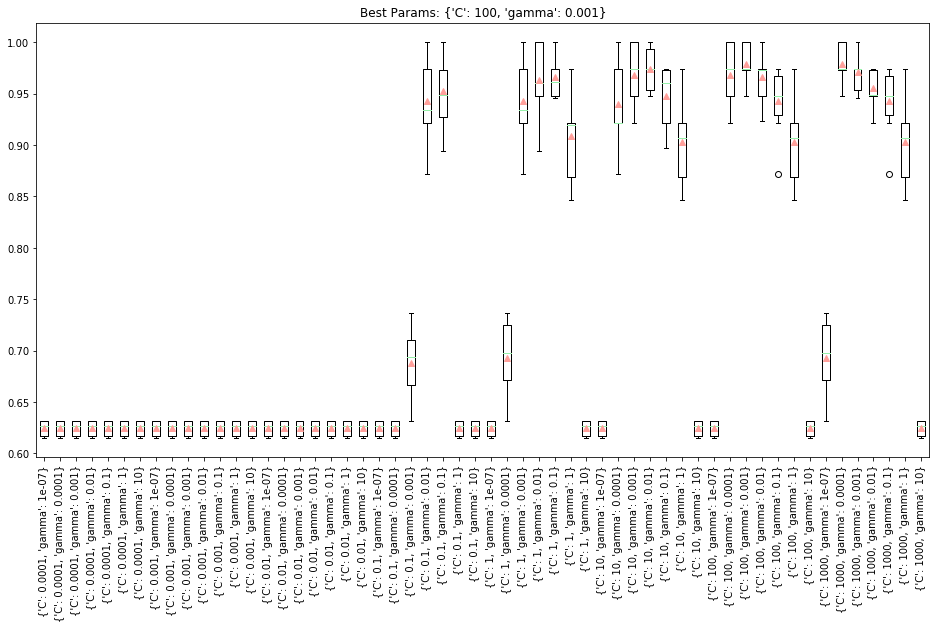

In [39]:
result_split = pd.DataFrame({ key:value for (key,value) in estimatecv.cv_results_.items() if key.find('split')>=0 })
result_split_columns = [str(x) for x in estimatecv.cv_results_['params']]
plt.figure(figsize=(16, 8))
plt.boxplot(result_split, showmeans=True, );
plt.xticks(range(1, len(result_split_columns) + 1), result_split_columns, rotation = 90)
plt.title(f"Best Params: {estimatecv.best_params_}")

Text(0.5, 1.0, 'Accuracy Heatmap')

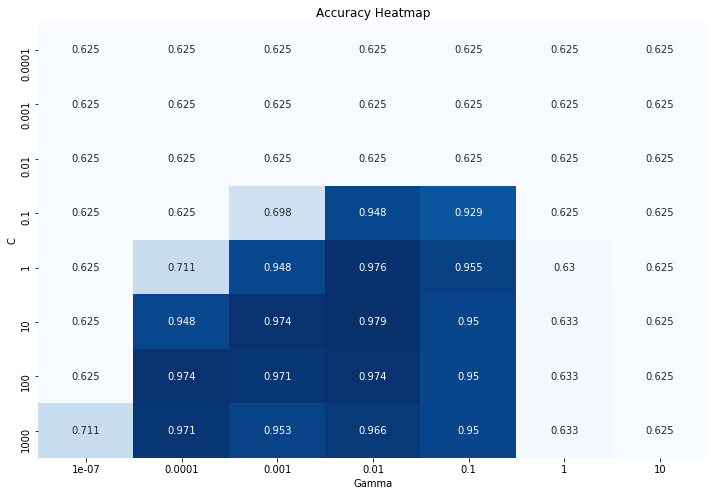

In [26]:
cv_params = np.array(estimatecv.cv_results_['mean_test_score']).reshape(8, 7)
plt.figure(figsize=(12, 8))
sns.heatmap(cv_params, 
            annot = True, 
            cmap = 'Blues', 
            cbar = False, 
            xticklabels=gamma_param_range, 
            yticklabels=c_param_range, 
            fmt='.3')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Accuracy Heatmap')

> __Comentario__:

## Ejercicio 5: Validación del modelo en el hold-out sample

* Genere las predicciones del hold-out sample en base a la mejor combinación de hiperparámetros. Genere un reporte con las métricas de desempeño clásicas para los modelos de clasificación. Comente en qué casos el modelo presenta un desempeño deficiente

In [27]:
yhat = estimatecv.predict(X_test)

In [28]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

          -1       0.98      0.99      0.99       119
           1       0.99      0.97      0.98        69

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



## Ejercicio (opcional): Depuración de atributos

* Reentrene el modelo en función de los atributos que presenten un coeficiente de overlap menor a .45.
* Reporte el desempeño del modelo y comente sobre los nuevos hiperparámetros estimados, así como su desempeño en comparación al modelo del ejercicio 5.

In [46]:
# Selecciono los nombres de atributos menos superpuestos
X_less_overlapping = [x for x in Overlap[Overlap['Overlap'] < .45]['Atributo']]
# Re-escalo los atributos
X_scaled_2 = StandardScaler().fit_transform(df.loc[:, X_less_overlapping])

In [48]:
# Selecciono mis set de datos para trabajar
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_scaled_2, 
                                                    df['diagnosis_bin'], 
                                                    test_size = .33, 
                                                    random_state = 14173)

In [49]:
estimatecv_less_overlapping = GridSearchCV(SVC(kernel = 'rbf'), params, cv = 10)
estimatecv_less_overlapping.fit(X_train_2, y_train_2)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1e-07, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [50]:
estimatecv_less_overlapping.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
estimatecv_less_overlapping.best_params_

{'C': 100, 'gamma': 0.001}

In [52]:
estimatecv_less_overlapping.best_score_

0.979002624671916

In [53]:
yhat_2 = estimatecv_less_overlapping.predict(X_test_2)

In [54]:
print(classification_report(y_test_2, yhat_2))

              precision    recall  f1-score   support

          -1       0.97      0.99      0.98       119
           1       0.98      0.94      0.96        69

    accuracy                           0.97       188
   macro avg       0.98      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



>__Comentario__:

Text(0.5, 1.0, "Best Params: {'C': 100, 'gamma': 0.001}")

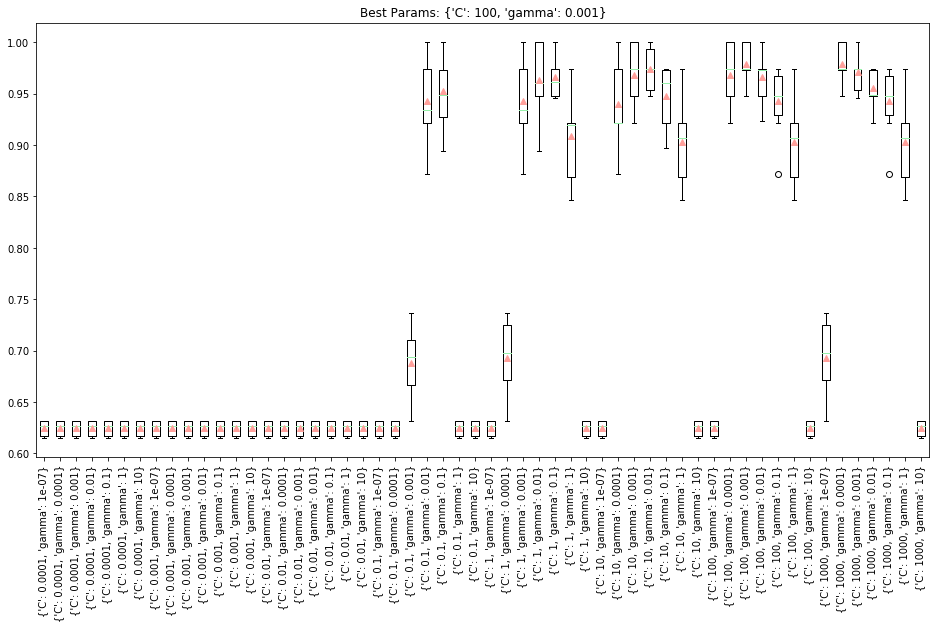

In [55]:
result_split = pd.DataFrame({ key:value for (key,value) in estimatecv_less_overlapping.cv_results_.items() if key.find('split')>=0 })
result_split_columns = [str(x) for x in estimatecv_less_overlapping.cv_results_['params']]
plt.figure(figsize=(16, 8))
plt.boxplot(result_split, showmeans=True, );
plt.xticks(range(1, len(result_split_columns) + 1), result_split_columns, rotation = 90)
plt.title(f"Best Params: {estimatecv_less_overlapping.best_params_}")

Text(0.5, 1.0, 'Accuracy Heatmap')

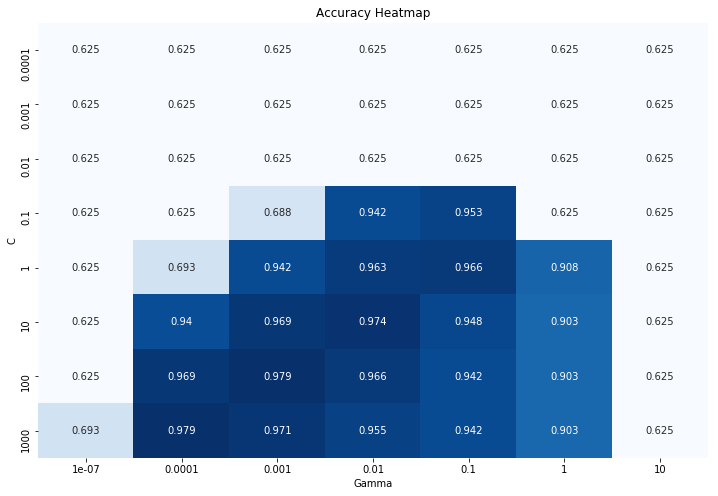

In [57]:
cv_params_2 = np.array(estimatecv_less_overlapping.cv_results_['mean_test_score']).reshape(8, 7)
plt.figure(figsize=(12, 8))
sns.heatmap(cv_params_2, 
            annot = True, 
            cmap = 'Blues', 
            cbar = False, 
            xticklabels=gamma_param_range, 
            yticklabels=c_param_range, 
            fmt='.3')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Accuracy Heatmap')